<a href="https://colab.research.google.com/github/AnesCenanovic/Vje-ta-kaInteligencija/blob/main/VILab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zadatak 1

In [2]:
import sys
!{sys.executable} -m pip install pyeasyga

  Preparing metadata (setup.py) ... done
  Created wheel for pyeasyga: filename=pyeasyga-0.3.1-py2.py3-none-any.whl size=6784 sha256=dd4e0999d0f73a3ce5ea40d2ad5a21c6bde96af649debd11c0890782f8103560
  Stored in directory: /root/.cache/pip/wheels/62/dc/8e/1f2f52b623874fe87032642a8fc1f64a2175fd26d77c95b469
Successfully built pyeasyga


Best individual fitness and best individual binary chromosome:
Fitness: 0.00015503146770612375, Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best individual decoded:
x1 = 0.0006, x2 = -0.0006
Best individual function value (re-evaluated):
f(x1, x2) = 0.0002

---------------------------

Last generation:
Fitness: 0.0002, Decoded: (0.0006, -0.0006), Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 0.0002, Decoded: (0.0006, -0.0006), Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness: 0.0008, Decoded: (0.0006, -0.0019), Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Fitness: 0.0008, Decoded: (0.0006, -0.0019), Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
Fitness: 0.0026, Decoded: (0.0031, -0.0019), Chromosome: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,

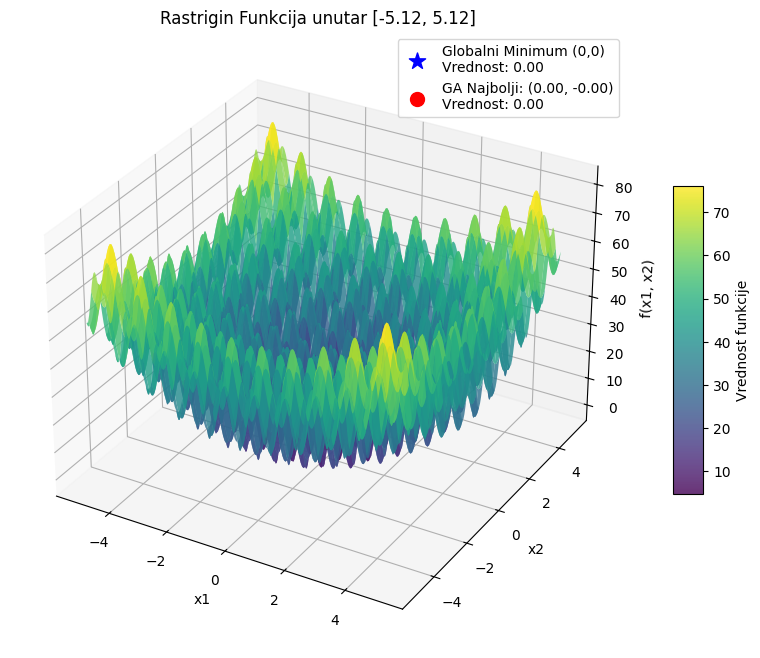

In [21]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 30,
                      generations = 200,
                      crossover_probability = 0.8,
                      mutation_probability = 0.84,
                      elitism = True,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 26
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


Best individual fitness and best individual binary chromosome:
Fitness: 22.77063643875411, Chromosome: [0, 1, 0, 0, 1, 0]
Best individual decoded:
x1 = -2.1943, x2 = -2.1943
Best individual function value (re-evaluated):
f(x1, x2) = 22.7706

---------------------------

Last generation:
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 2

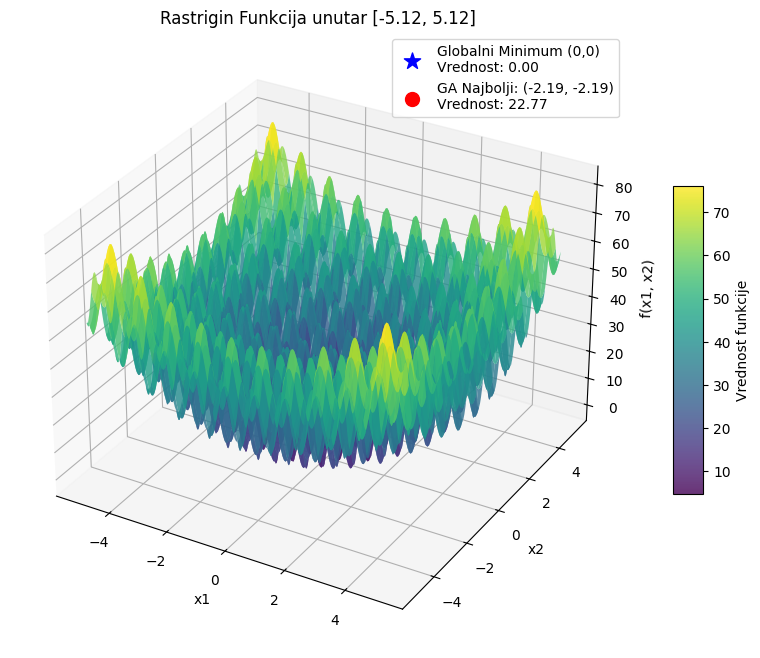

In [20]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 30,
                      generations = 200,
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = True,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 6
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


In [ ]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 30,
                      generations = 200,
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = True,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 6
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


Best individual fitness and best individual binary chromosome:
Fitness: 22.77063643875411, Chromosome: [0, 1, 0, 0, 1, 0]
Best individual decoded:
x1 = -2.1943, x2 = -2.1943
Best individual function value (re-evaluated):
f(x1, x2) = 22.7706

---------------------------

Last generation:
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 22.7706, Decoded: (-2.1943, -2.1943), Chromosome: [0, 1, 0, 0, 1, 0]
Fitness: 23.0845, Decoded: (-0.7314, -2.1943), Chromosome: [0, 1, 1, 0, 1, 0]
Fitness: 23.0845, Decoded: (-2.1943, -0.7314), Chromosome: [0, 1, 0, 0, 1, 1]
Fitness: 23.0845, Decoded: (-2.1943, -0.7314), Chromosome: [0, 1, 0, 0, 1, 1]
Fitness: 23.0845, Decoded: (-0.7314, -2.1943), Chromosome: [0, 1, 1, 0, 1, 0]
Fitness: 23.0845, Decoded: (0.7314, -2.1943), Chromosome: [1, 0, 0, 0, 1, 0]
Fitness: 23

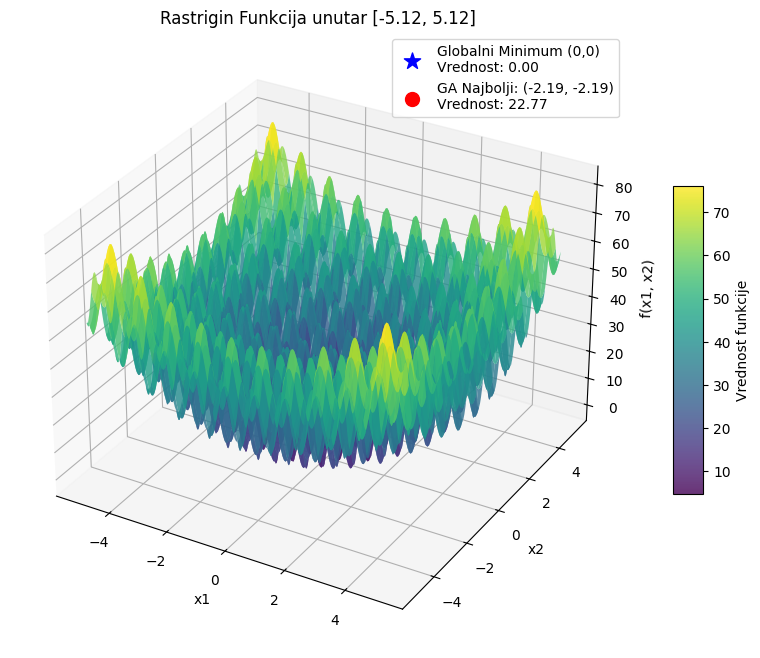

In [22]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 30,
                      generations = 200,
                      crossover_probability = 0.8,
                      mutation_probability = 0.84,
                      elitism = True,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 6
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


Best individual fitness and best individual binary chromosome:
Fitness: 1.9900835891580293, Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Best individual decoded:
x1 = -0.9957, x2 = 0.9945
Best individual function value (re-evaluated):
f(x1, x2) = 1.9901

---------------------------

Last generation:
Fitness: 1.9901, Decoded: (-0.9957, 0.9945), Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Fitness: 1.9901, Decoded: (-0.9957, 0.9945), Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Fitness: 1.9901, Decoded: (-0.9957, 0.9945), Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Fitness: 1.9901, Decoded: (-0.9957, 0.9945), Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Fitness: 1.9901, Decoded: (-0.9957, 0.9945), Chromosome: [0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 

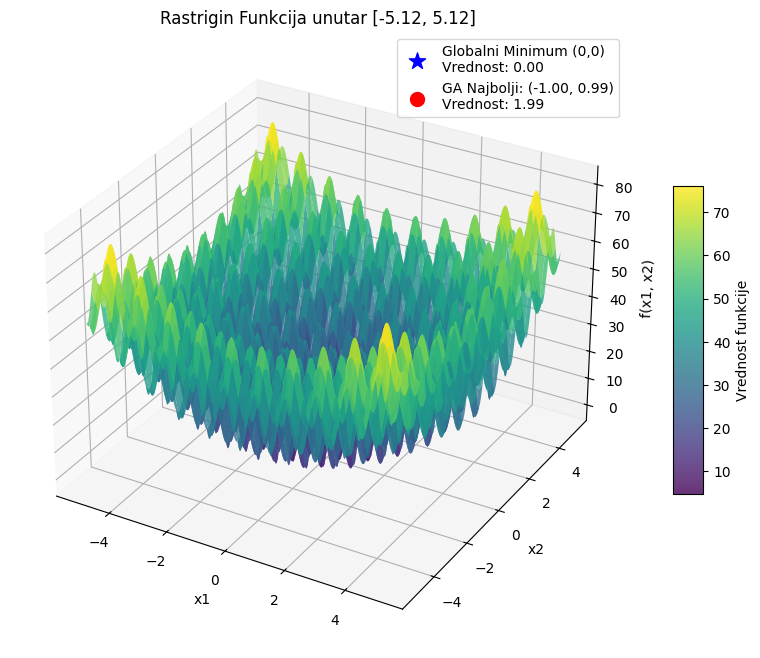

In [23]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 50,
                      generations = 100,
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = True,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 26
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


Best individual fitness and best individual binary chromosome:
Fitness: 14.823620529323117, Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Best individual decoded:
x1 = -0.8157, x2 = -1.8371
Best individual function value (re-evaluated):
f(x1, x2) = 14.8236

---------------------------

Last generation:
Fitness: 14.8236, Decoded: (-0.8157, -1.8371), Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Fitness: 14.8236, Decoded: (-0.8157, -1.8371), Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Fitness: 14.8236, Decoded: (-0.8157, -1.8371), Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Fitness: 14.8236, Decoded: (-0.8157, -1.8371), Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Fitness: 14.8236, Decoded: (-0.8157, -1.8371), Chromosome: [0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 

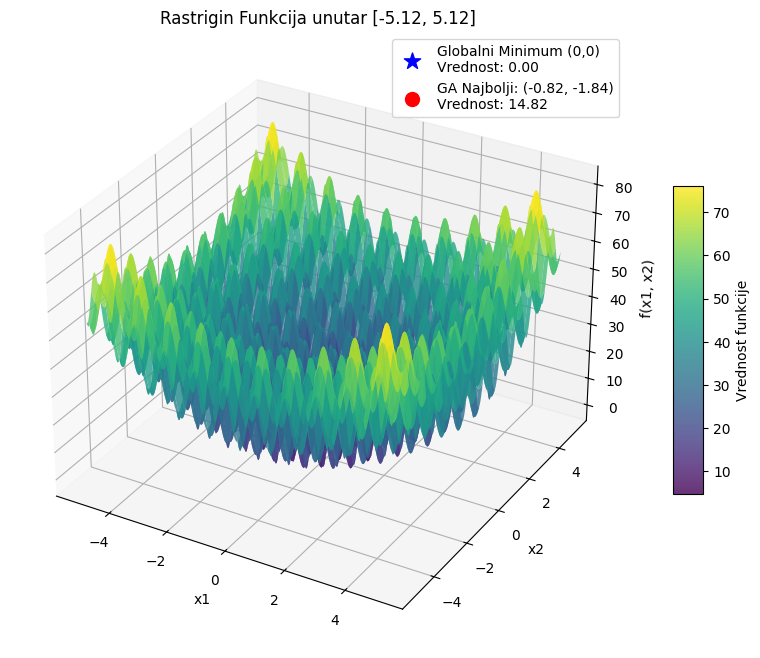

In [24]:
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  A = 10
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

# x is in range [-5, 5], y is in range [-5, 5]
RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga = GeneticAlgorithm(seed_data = criteria_function,
                      population_size = 5,
                      generations = 100,
                      crossover_probability = 0.8,
                      mutation_probability = 0.02,
                      elitism = False,
                      maximise_fitness = False)

# first half => x, second half => y
BINARY_CHROMOSOME_LENGTH = 26
# randomly generate candidate solution, used in generating initial population
def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga.create_individual = create_individual

# two-point crossover
def crossover(parent_1, parent_2):
  crossover_index1 = random.randrange(1, len(parent_1)-1)
  crossover_index2 = random.randrange(crossover_index1+1, len(parent_1))
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:
  crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:
  crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga.crossover_function = crossover

# randomly select a bit and invert it
def mutate(individual):
   mutate_index = random.randrange(len(individual))
   if individual[mutate_index] == 0:
      individual[mutate_index] = 1
   else:
      individual[mutate_index] = 0

ga.mutate_function = mutate

# define selection function here if necessary
# def selection(population):
# and assign it to the selection_function method
# ga.selection_function = selection

# using tournament selection by default

# set tournament size to 2
ga.tournament_size = 2

# list of 1s and 0s to decimal ([1,0,0,1] -> 9)
def decimal(binary):
  sum = 0
  for i in range(0, len(binary)):
    sum += binary[len(binary)-1-i]*2**(i)
  return sum

# decoding binary representation of individuals
def decode(individual):
 x_binary = individual[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range = RANGE[0]
 y_range = RANGE[1]
 x_min = x_range[0]
 x_max = x_range[1]
 y_min = y_range[0]
 y_max = y_range[1]
 x_decode = x_min + ((x_max - x_min)*decimal(x_binary))/(2**(len(x_binary)) - 1)
 y_decode = y_min + ((y_max - y_min)*decimal(y_binary))/(2**(len(y_binary)) - 1)
 return x_decode, y_decode

def is_in_range(x, range_x):
  return x >= range_x[0] and x<= range_x[1]

def fitness (individual, data):
  x_decode, y_decode = decode(individual)
  while not (is_in_range(x_decode, RANGE[0]) and is_in_range(y_decode, RANGE[1])):
    individual = create_individual(data)
    x_decode, y_decode = decode(individual)
  fitness = data([x_decode, y_decode])
  return fitness

ga.fitness_function = fitness
ga.run()

print("Best individual fitness and best individual binary chromosome:")
best_fitness_val, best_chromo = ga.best_individual()
print(f"Fitness: {best_fitness_val}, Chromosome: {best_chromo}")


print("Best individual decoded:")
decoded_coords = decode(best_chromo)
print(f"x1 = {decoded_coords[0]:.4f}, x2 = {decoded_coords[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria = criteria_function(decoded_coords)
print(f"f(x1, x2) = {re_eval_criteria:.4f}")

print("\n---------------------------\n")

print("Last generation:")
for individual_fitness, individual_chromosome in ga.last_generation():
  decoded_ind = decode(individual_chromosome)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome}")

# 1. Create a grid of points
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 200) # Increased points for smoother plot
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# 2. Evaluate the function on the grid
Z = criteria_function([X1, X2])

# 3. Create the plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin Funkcija unutar [-5.12, 5.12]')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Vrednost funkcije')

# Highlight the true global minimum
ax.scatter(0, 0, 0, color='blue', s=150, marker='*', label='Globalni Minimum (0,0)\nVrednost: 0.00', depthshade=True)

# Highlight the found minimum by the GA
ga_min_x1, ga_min_x2 = decoded_coords
ga_min_z = re_eval_criteria # Use the re-evaluated value
ax.scatter(ga_min_x1, ga_min_x2, ga_min_z, color='red', s=100, label=f'GA Najbolji: ({ga_min_x1:.2f}, {ga_min_x2:.2f})\nVrednost: {ga_min_z:.2f}', depthshade=True)
ax.legend()

plt.show()


--- ROULETTE WHEEL SELECTION RESULTS ---
Fitness: 3.3945789880636212, Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Best individual decoded:
x1 = 0.0931, x2 = -1.0558
Best individual function value (re-evaluated):
f(x1, x2) = 3.3946

---------------------------

Last generation (Roulette Wheel):
Fitness: 3.3946, Decoded: (0.0931, -1.0558), Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Fitness: 3.3946, Decoded: (0.0931, -1.0558), Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Fitness: 3.3946, Decoded: (0.0931, -1.0558), Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Fitness: 3.3946, Decoded: (0.0931, -1.0558), Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
Fitness: 3.3946, Decoded: (0.0931, -1.0558), Chromosome: [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,

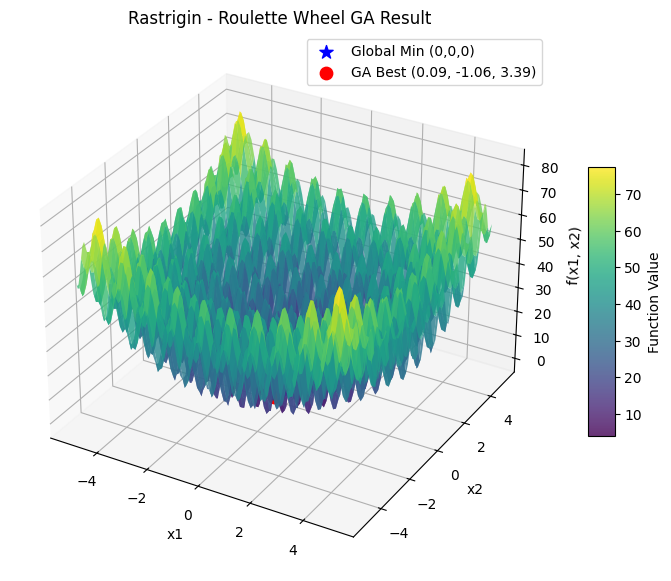

In [30]:
# ROULETTE WHEEL SELECTION (CORRECTED)
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga_roulette = GeneticAlgorithm(seed_data=criteria_function,
                               population_size=5,
                               generations=100,
                               crossover_probability=0.8,
                               mutation_probability=0.02,
                               elitism=True,
                               maximise_fitness=False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga_roulette.create_individual = create_individual

def crossover(parent_1, parent_2):
  indices = sorted(random.sample(range(1, len(parent_1)), 2))
  crossover_index1, crossover_index2 = indices[0], indices[1]
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga_roulette.crossover_function = crossover

def mutate(individual):
   mutate_index = random.randrange(len(individual))
   individual[mutate_index] = 1 - individual[mutate_index]
   return individual

ga_roulette.mutate_function = mutate

def roulette_wheel_selection(population):

    fitness_values = [ch.fitness for ch in population]

    if not fitness_values:
        return create_individual(None)


    if len(set(fitness_values)) == 1:
        return random.choice(population)

    max_fitness = max(fitness_values)
    selection_fitnesses = [(max_fitness - ch.fitness) + 1.0 for ch in population]
    total_selection_fitness = sum(selection_fitnesses)

    if total_selection_fitness == 0:
        return random.choice(population)

    pick = random.uniform(0, total_selection_fitness)
    current_sum = 0
    for i, ch in enumerate(population):
        current_sum += selection_fitnesses[i]
        if current_sum > pick:
            return ch

    return population[-1]

ga_roulette.selection_function = roulette_wheel_selection

def decimal(binary):
  sum_val = 0
  for i in range(len(binary)):
    sum_val += binary[len(binary)-1-i] * (2**i)
  return sum_val

def decode(individual_genes):
 x_binary = individual_genes[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual_genes[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range_def = RANGE[0]
 y_range_def = RANGE[1]
 x_min, x_max = x_range_def[0], x_range_def[1]
 y_min, y_max = y_range_def[0], y_range_def[1]

 denominator_x = (2**(len(x_binary))) - 1
 denominator_y = (2**(len(y_binary))) - 1

 x_decode = x_min + ((x_max - x_min) * decimal(x_binary)) / denominator_x if denominator_x > 0 else x_min
 y_decode = y_min + ((y_max - y_min) * decimal(y_binary)) / denominator_y if denominator_y > 0 else y_min
 return x_decode, y_decode

def fitness(individual_genes, data_func):
  x_decode, y_decode = decode(individual_genes)
  return data_func([x_decode, y_decode])

ga_roulette.fitness_function = fitness
ga_roulette.run()

print("--- ROULETTE WHEEL SELECTION RESULTS ---")
best_fitness_val_r, best_chromo_genes_r = ga_roulette.best_individual()
print(f"Fitness: {best_fitness_val_r}, Chromosome: {best_chromo_genes_r}")

print("Best individual decoded:")
decoded_coords_r = decode(best_chromo_genes_r)
print(f"x1 = {decoded_coords_r[0]:.4f}, x2 = {decoded_coords_r[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria_r = criteria_function(decoded_coords_r)
print(f"f(x1, x2) = {re_eval_criteria_r:.4f}")

print("\n---------------------------\n")
print("Last generation (Roulette Wheel):")
for individual_fitness, individual_chromosome_genes in ga_roulette.last_generation():
  decoded_ind = decode(individual_chromosome_genes)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome_genes}")

# Plotting
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 100)
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = criteria_function([X1, X2])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin - Roulette Wheel GA Result')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Function Value')
ax.scatter(0, 0, 0, color='blue', s=100, marker='*', label='Global Min (0,0,0)', depthshade=True)
ax.scatter(decoded_coords_r[0], decoded_coords_r[1], re_eval_criteria_r, color='red', s=80, label=f'GA Best ({decoded_coords_r[0]:.2f}, {decoded_coords_r[1]:.2f}, {re_eval_criteria_r:.2f})', depthshade=True)
ax.legend()
plt.show()

--- RANK-BASED SELECTION RESULTS ---
Fitness: 21.819917740737417, Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Best individual decoded:
x1 = -4.0386, x2 = 1.9096
Best individual function value (re-evaluated):
f(x1, x2) = 21.8199

---------------------------

Last generation (Rank-Based):
Fitness: 21.8199, Decoded: (-4.0386, 1.9096), Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Fitness: 21.8199, Decoded: (-4.0386, 1.9096), Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Fitness: 21.8199, Decoded: (-4.0386, 1.9096), Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Fitness: 21.8199, Decoded: (-4.0386, 1.9096), Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
Fitness: 21.8199, Decoded: (-4.0386, 1.9096), Chromosome: [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1

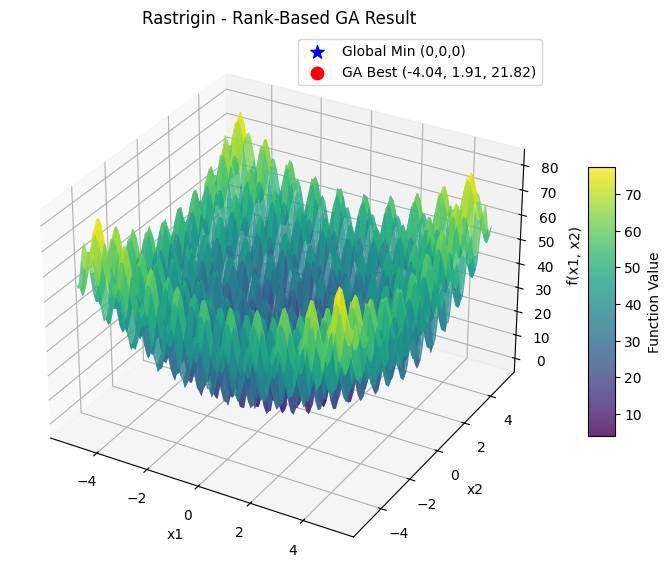

In [31]:
# RANK-BASED SELECTION (CORRECTED)
from pyeasyga.pyeasyga import GeneticAlgorithm
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def criteria_function(x):
  x1 = x[0]
  x2 = x[1]
  return 20 + x1**2 + x2**2 - 10 * (np.cos(2 * np.pi * x1) + np.cos(2 * np.pi * x2))

RANGE = np.array([[-5.12, 5.12], [-5.12, 5.12]])

ga_rank = GeneticAlgorithm(seed_data=criteria_function,
                           population_size=5,
                           generations=100,
                           crossover_probability=0.8,
                           mutation_probability=0.02,
                           elitism=False,
                           maximise_fitness=False)

BINARY_CHROMOSOME_LENGTH = 26

def create_individual(data):
  return [random.randint(0, 1) for _ in range(BINARY_CHROMOSOME_LENGTH)]

ga_rank.create_individual = create_individual

def crossover(parent_1, parent_2):
  indices = sorted(random.sample(range(1, len(parent_1)), 2))
  crossover_index1, crossover_index2 = indices[0], indices[1]
  child_1 = parent_1[:crossover_index1] + parent_2[crossover_index1:crossover_index2] + parent_1[crossover_index2:]
  child_2 = parent_2[:crossover_index1] + parent_1[crossover_index1:crossover_index2] + parent_2[crossover_index2:]
  return child_1, child_2

ga_rank.crossover_function = crossover

def mutate(individual):
   mutate_index = random.randrange(len(individual))
   individual[mutate_index] = 1 - individual[mutate_index]
   return individual

ga_rank.mutate_function = mutate

def rank_based_selection(population):

    if not population:
        return create_individual(None)


    sorted_population = sorted(population, key=lambda ch: ch.fitness)
    pop_size = len(sorted_population)

    rank_scores = [pop_size - i for i in range(pop_size)]
    total_rank_score = sum(rank_scores)

    if total_rank_score == 0:
        return random.choice(sorted_population)

    pick = random.uniform(0, total_rank_score)
    current_sum = 0
    for i in range(pop_size):
        current_sum += rank_scores[i]
        if current_sum > pick:
            return sorted_population[i]

    return sorted_population[-1]

ga_rank.selection_function = rank_based_selection

def decimal(binary):
  sum_val = 0
  for i in range(len(binary)):
    sum_val += binary[len(binary)-1-i] * (2**i)
  return sum_val

def decode(individual_genes):
 x_binary = individual_genes[:BINARY_CHROMOSOME_LENGTH // 2]
 y_binary = individual_genes[BINARY_CHROMOSOME_LENGTH // 2:]
 x_range_def = RANGE[0]
 y_range_def = RANGE[1]
 x_min, x_max = x_range_def[0], x_range_def[1]
 y_min, y_max = y_range_def[0], y_range_def[1]

 denominator_x = (2**(len(x_binary))) - 1
 denominator_y = (2**(len(y_binary))) - 1

 x_decode = x_min + ((x_max - x_min) * decimal(x_binary)) / denominator_x if denominator_x > 0 else x_min
 y_decode = y_min + ((y_max - y_min) * decimal(y_binary)) / denominator_y if denominator_y > 0 else y_min
 return x_decode, y_decode

def fitness(individual_genes, data_func):
  x_decode, y_decode = decode(individual_genes)
  return data_func([x_decode, y_decode])

ga_rank.fitness_function = fitness
ga_rank.run()

print("--- RANK-BASED SELECTION RESULTS ---")
best_fitness_val_k, best_chromo_genes_k = ga_rank.best_individual()
print(f"Fitness: {best_fitness_val_k}, Chromosome: {best_chromo_genes_k}")

print("Best individual decoded:")
decoded_coords_k = decode(best_chromo_genes_k)
print(f"x1 = {decoded_coords_k[0]:.4f}, x2 = {decoded_coords_k[1]:.4f}")

print("Best individual function value (re-evaluated):")
re_eval_criteria_k = criteria_function(decoded_coords_k)
print(f"f(x1, x2) = {re_eval_criteria_k:.4f}")

print("\n---------------------------\n")
print("Last generation (Rank-Based):")
for individual_fitness, individual_chromosome_genes in ga_rank.last_generation():
  decoded_ind = decode(individual_chromosome_genes)
  print(f"Fitness: {individual_fitness:.4f}, Decoded: ({decoded_ind[0]:.4f}, {decoded_ind[1]:.4f}), Chromosome: {individual_chromosome_genes}")

# Plotting
x1_vals = np.linspace(RANGE[0][0], RANGE[0][1], 100)
x2_vals = np.linspace(RANGE[1][0], RANGE[1][1], 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = criteria_function([X1, X2])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Rastrigin - Rank-Based GA Result')
fig.colorbar(surf, shrink=0.5, aspect=10, label='Function Value')
ax.scatter(0, 0, 0, color='blue', s=100, marker='*', label='Global Min (0,0,0)', depthshade=True)
ax.scatter(decoded_coords_k[0], decoded_coords_k[1], re_eval_criteria_k, color='red', s=80, label=f'GA Best ({decoded_coords_k[0]:.2f}, {decoded_coords_k[1]:.2f}, {re_eval_criteria_k:.2f})', depthshade=True)
ax.legend()
plt.show()

Zadatak 2

In [33]:
import random
from pyeasyga import pyeasyga

# setup seed data
seed_data = [0, 1, 2, 3, 4, 5, 6, 7]
N_QUEENS = len(seed_data)

ga = pyeasyga.GeneticAlgorithm(seed_data,
                            population_size=200,
                            generations=100,
                            crossover_probability=0.8,
                            mutation_probability=0.2,
                            elitism=True,
                            maximise_fitness=False)

def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

ga.create_individual = create_individual

def crossover(parent_1, parent_2):
    crossover_index = random.randrange(1, len(parent_1))

    child_1a = parent_1[:crossover_index]
    child_1b = [i for i in parent_2 if i not in child_1a]
    child_1 = child_1a + child_1b

    if len(child_1) != len(parent_1):
        pass

    child_2a_orig = parent_2[crossover_index:]
    child_2b_orig = [i for i in parent_1 if i not in child_2a_orig]
    child_2 = child_2b_orig + child_2a_orig

    child_2_temp_segment = parent_2[crossover_index:]
    child_2_fill = []
    for gene in parent_1:
        if gene not in child_2_temp_segment:
            child_2_fill.append(gene)


    return child_1, child_2


ga.crossover_function = crossover

def mutate(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]

ga.mutate_function = mutate


def selection(population):
    return random.choice(population)

ga.selection_function = selection


def fitness (individual_genes, data):
    collisions = 0
    n = len(individual_genes)
    for i in range(n):
        for j in range(i + 1, n):
            if abs(individual_genes[i] - individual_genes[j]) == abs(i - j):
                collisions += 1
    return collisions

ga.fitness_function = fitness
ga.run()

def print_board(board_representation):
    def print_x_in_row(row_length, queen_col_for_this_row):

        print(' ', end='')
        for _ in range(row_length):
            print('---', end='')
        print()
        print('|', end='')
        for i in range(row_length):
            if i == queen_col_for_this_row:
                print(' X |', end='')
            else:
                print('   |', end='')
        print()

    def print_board_bottom(row_length):
        print(' ', end='')
        for _ in range(row_length):
            print('---', end='')
        print()

    num_of_rows = len(board_representation)
    ga_output_format = board_representation

    n_size = len(board_representation)

    for r in range(n_size):
        queen_col_in_this_row = -1
        for c in range(n_size):
            if board_representation[c] == r:
                queen_col_in_this_row = c
                break

        print(' ', end='')
        for _ in range(n_size):
            print('---', end='')
        print()
        print('|', end='')
        for i in range(n_size):
            if i == queen_col_in_this_row:
                print(' X |', end='')
            else:
                print('   |', end='')
        print()

    print_board_bottom(n_size)
    print('\n')


best_fitness, best_solution_genes = ga.best_individual()

if best_fitness == 0:
    print("Best solution (fitness, genes):")
    print(f"({best_fitness}, {best_solution_genes})")
    print("\nBoard representation:")
    print_board(best_solution_genes)
else:
    print("No perfect solution found with 0 collisions.")
    print(f"Best found (fitness, genes): ({best_fitness}, {best_solution_genes})")
    if best_solution_genes:
        print("\nBoard for best found solution:")
        print_board(best_solution_genes)


Best solution (fitness, genes):
(0, [3, 6, 0, 7, 4, 1, 5, 2])

Board representation:
 ------------------------
|   |   | X |   |   |   |   |   |
 ------------------------
|   |   |   |   |   | X |   |   |
 ------------------------
|   |   |   |   |   |   |   | X |
 ------------------------
| X |   |   |   |   |   |   |   |
 ------------------------
|   |   |   |   | X |   |   |   |
 ------------------------
|   |   |   |   |   |   | X |   |
 ------------------------
|   | X |   |   |   |   |   |   |
 ------------------------
|   |   |   | X |   |   |   |   |
 ------------------------


